In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The fondation of Lewis algorithm is based on the acceptance-rejection method to generate a random variable given an upper bound of its distribution function  . 

In [402]:
def Proces_Inhomegene(T, lambda_, n_max):
    
    """
        n_loop = the number of time we enter the for loop 
        T = max time 
        lambda_ = deterministic intensity function
        n_max = size of the time discretization 
        
    """
    t = 0
    i=0
    lambda_star = max([lambda_(t) for t in np.linspace(0, T, n_max)])
    trajectory =[]
    while t<T:
        U = np.random.uniform()
        t = t-np.log(U)/lambda_star
        if t< T:
            P = np.random.uniform()
            if lambda_(t)/(lambda_star*P)>=1:
                trajectory.append(t)
    return trajectory 

$\textbf{Application}$
 $$ \lambda(t) = 10((t − \frac{1}{2} )^2 + 1) ~~ \mbox{sur}~~ [0, 1] $$

In [403]:
lambda_ = lambda x : 10*((x-0.5)**2+1)
n_max= 1000
T=1

In [404]:
trajectory =[]
for i in range(1000):
    trajectory.append(Proces_Inhomegene(T, lambda_, n_max))

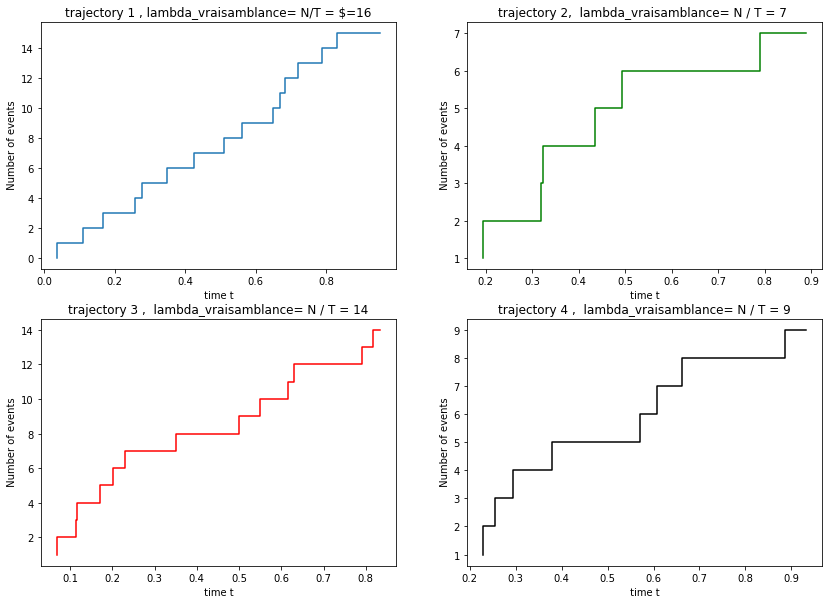

In [410]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.step(trajectory[0], range(len(trajectory[0])))
plt.xlabel(" time t ")
plt.ylabel(" Number of events")
plt.title(f"trajectory 1 , lambda_vraisamblance= N/T = $={len(trajectory[0])}")

plt.subplot(2,2,2)
plt.step(trajectory[1], np.cumsum(np.ones(len(trajectory[1]))), color="green")
plt.xlabel(" time t ")
plt.ylabel(" Number of events")
plt.title(f"trajectory 2,  lambda_vraisamblance= N / T = {len(trajectory[1])} ")
         
plt.subplot(2,2,3)
plt.step(trajectory[2], np.cumsum(np.ones(len(trajectory[2]))), color="red")
plt.xlabel(" time t ")
plt.ylabel(" Number of events")
plt.title(f"trajectory 3 ,  lambda_vraisamblance= N / T = {len(trajectory[2])}")

plt.subplot(2,2,4)
plt.step(trajectory[3], np.cumsum(np.ones(len(trajectory[3]))), color="black")
plt.xlabel(" time t ")
plt.ylabel(" Number of events")
plt.title(f"trajectory 4 ,  lambda_vraisamblance= N / T = {len(trajectory[3])}")

plt.show()

In [105]:
T=1
lambda_vraisamblance = [len(trajec)/T for trajec in trajectory]

In [106]:
import scipy.stats as sps

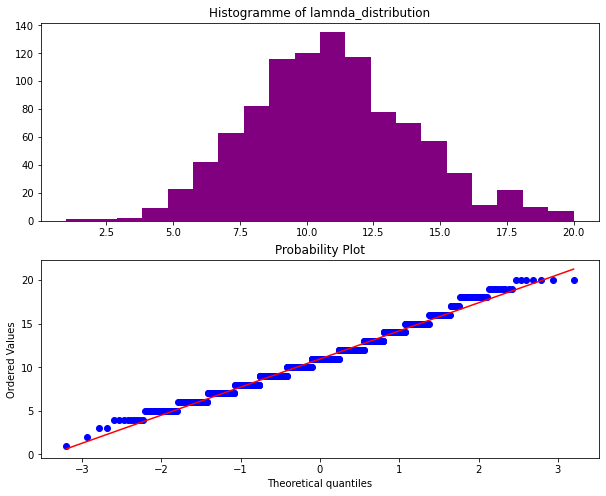

In [111]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.hist(lambda_vraisamblance, color='purple', bins=20)
plt.title(f"Histogramme of lamnda_distribution")

plt.subplot(2,1,2)
sps.probplot(lambda_vraisamblance, dist="norm", plot=plt)
plt.show()

### Analysis 

Quantile-Quantile plot is used to compare two distribustions using their respective quantiles. The benchmark distribution we used here is a normal distribution. From what we can see, the maximum likelihood follows quite well a normal distribution with a mean around 12 and a standard deviation around 3.3.  The theorical maximum of the intensity corresponds to $\lambda^{*} = \sup_{t \in[0, T]} 10((t-\frac{1}{1})^2 + 1) = 12.5$.  This latter value is close to the mean value 12. However the variance of the empirical distribution is large. Which lets us state that the maximum likelihood estimator is unbiased but has a large variance.

### Time change theorem


We now use another simulation method inspired by the time change theorem . It states that the transformed durations of a point process defined between two jumps is defined by :

$${\tau}_{i} = \int_{T_i}^{T_{i+1}}\lambda(s)ds $$ are i.i.d exponential random variable with parameter 1. We can use this theorem to get the transform duration given a deterministic function $\lambda$ : 

After integration of $\lambda$  which has a closed expression, we obtains:

$$\tau_i = 10[\frac{1}{3}(T_{i+1}^3 - T_{i}^3)+\frac{1}{2}(T_{i+1}^2 - T_{i}^2)+\frac{5}{4}(T_{i+1}-T_i)]$$. 

Luckely, the integral of $\lambda$ has a closed form which facilitates the computation of $\tau$. If that was not the case , we would have used an algorithmic method to access the tranform duration. 

###  2.2 Simulation of Hawkes processes

Ici on s'interesse à un processus de Hawkes unidimensionnel N avec noyau exponentiel, dont l'intensité vérifie l'équation suivante :

$$\lambda(t) = \lambda_0 + \int_{0}^{t} \alpha e^{-\beta (t-s)}dN(s)$$
$$\lambda(t) =  \lambda_0 + \sum_{t_i <t } \alpha e^{-\beta(t-t_i)}$$



In [205]:
def Proces_Hawkes(T, lambda_0, alpha, beta):
    
    """
        n_loop = the number of time we enter the for loop 
        T = max time 
        lambda_ = deterministic intensity function
        N = discretization size of intervale [0, T]
    """
    
    def lambda_comp(list_t):
        return lambda_0+np.sum(alpha*np.exp(-beta*(t-list_t)))
    t = 0    
    lambda_star = lambda_0+ alpha
    trajectory =[]
    lambda_jump_dic = {}
    lambda_star_list = []
    N=[0]
    while t< T:
        U = np.random.uniform()
        t = t-np.log(U)/lambda_star
        if t< T:
            P = np.random.uniform()
            if lambda_comp(N)/(lambda_star*P)>=1:
                N+=[t]
                lambda_jump_dic[t] =lambda_comp(N)
                lambda_star = lambda_star + alpha
    return N, lambda_jump_dic 

In [208]:
###
T =1 
alpha = 1
beta = 2
lambda_0 = 10

In [230]:
beta = 2
trajec_1 =[]
lambda_list_1=[]
for j in range(1000):
    trajectory, lambda_star = Proces_Hawkes(T, lambda_0, alpha, beta)
    trajec_1.append((trajectory))
    lambda_list_1.append((lambda_star))
    

beta = 4
trajec_2 =[]
lambda_list_2=[]
for j in range(1000):
    trajectory, lambda_star = Proces_Hawkes(T, lambda_0, alpha, beta)
    trajec_2.append(trajectory)
    lambda_list_2.append(lambda_star)
    
beta = 6
trajec_3 =[]
lambda_list_3=[]
for j in range(1000):
    trajectory, lambda_star = Proces_Hawkes(T, lambda_0, alpha, beta)
    trajec_3.append(trajectory)
    lambda_list_3.append(lambda_star)
    
beta = 8
trajec_4 =[]
lambda_list_4=[]
for j in range(1000):
    trajectory, lambda_star = Proces_Hawkes(T, lambda_0, alpha, beta)
    trajec_4.append(trajectory)
    lambda_list_4.append(lambda_star)
    


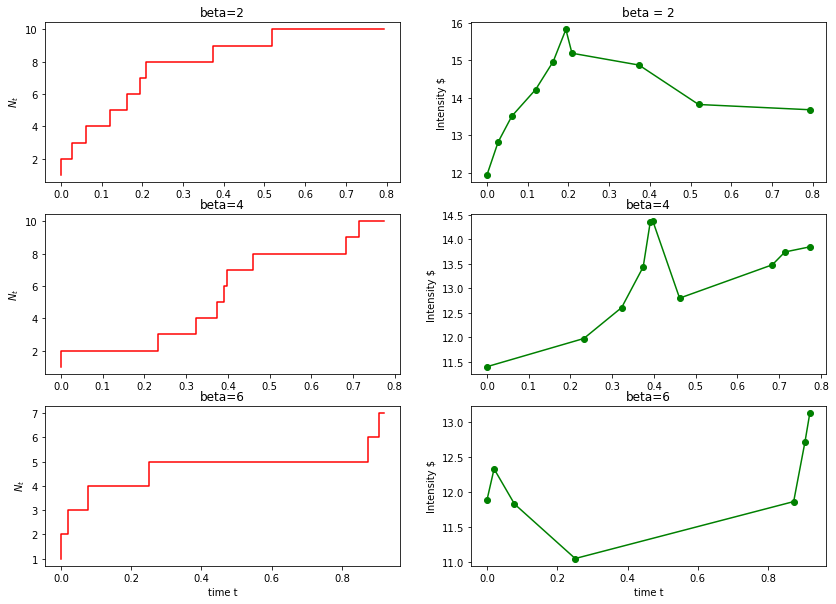

In [233]:
plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
plt.step(trajec_1[0][:-1], np.cumsum(np.ones(len(trajec_1[0][:-1]))), color='red')
plt.ylabel(" $N_t$")
plt.title("beta=2")
plt.subplot(3,2,2)
plt.plot(trajec_1[0][:-1], list(lambda_list_1[0].values()) ,'o', color='green')
plt.plot(trajec_1[0][:-1], list(lambda_list_1[0].values()) , color='green')

plt.ylabel("Intensity $")
plt.title("beta = 2")


plt.subplot(3,2,3)
plt.step(trajec_2[0][:-1], np.cumsum(np.ones(len(trajec_2[0][:-1]))), color='red')
plt.ylabel("$N_t$")
plt.title("beta=4")
plt.subplot(3,2,4)
plt.plot(trajec_2[0][:-1], list(lambda_list_2[0].values()),'o', color='green')
plt.plot(trajec_2[0][:-1], list(lambda_list_2[0].values()), color='green')

plt.ylabel("Intensity $")
plt.title("beta=4")

plt.subplot(3,2,5)
plt.step(trajec_3[0][:-1], np.cumsum(np.ones(len(trajec_3[0][:-1]))), color='red')
plt.xlabel("time t")
plt.ylabel(" $N_t$")
plt.title("beta=6")
plt.subplot(3,2,6)
plt.plot(trajec_3[0][:-1], list(lambda_list_3[0].values()) ,'o', color='green')
plt.plot(trajec_3[0][:-1], list(lambda_list_3[0].values()), color='green')

plt.xlabel("time t")
plt.ylabel("Intensity $")
plt.title("beta=6")

plt.show()

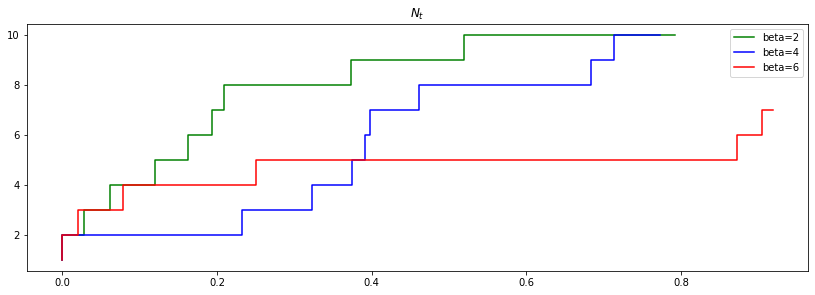

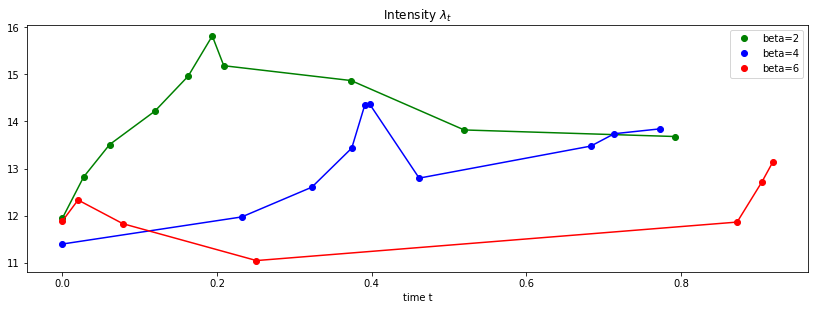

In [238]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.step(trajec_1[0][:-1], np.cumsum(np.ones(len(trajec_1[0][:-1]))), color='green', label="beta=2")
plt.step(trajec_2[0][:-1], np.cumsum(np.ones(len(trajec_2[0][:-1]))), color='blue', label="beta=4")
plt.step(trajec_3[0][:-1], np.cumsum(np.ones(len(trajec_3[0][:-1]))), color='red', label="beta=6")
plt.title("$N_t$ ")
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(2,1,2)
plt.plot(trajec_1[0][:-1], list(lambda_list_1[0].values()) ,'o', color='green', label="beta=2")
plt.plot(trajec_1[0][:-1], list(lambda_list_1[0].values()) , color='green')

plt.plot(trajec_2[0][:-1], list(lambda_list_2[0].values()),'o', color='blue', label="beta=4")
plt.plot(trajec_2[0][:-1], list(lambda_list_2[0].values()), color='blue')

plt.plot(trajec_3[0][:-1], list(lambda_list_3[0].values()) ,'o', color='red', label="beta=6")
plt.plot(trajec_3[0][:-1], list(lambda_list_3[0].values()), color='red')
plt.xlabel("time t")
plt.title("Intensity $\lambda_t$")
plt.legend()
plt.show()

#### Distribution of the Number of events 

In [310]:
data={}
data["mean"]= []
data["std"]= []
data["beta"] = [2,4,8,12]
for beta in [2,4,8,12]:
    data["mean"].append(np.mean(n_events[beta]))
    data["std"].append(np.std(n_events[beta]))

In [289]:
n_simulaton = 1000
n_events ={}
for i, beta in enumerate([2,4,8,12]):
    n_events[beta] = []
    for j in range(n_simulaton):
        N, lambda_star = Proces_Hawkes(T, lambda_0, alpha, beta)
        n_events[beta]+=[len(N)-1]# N start with 0

In [311]:
dataframe = pd.DataFrame(data , columns=["beta","mean", "std"])
dataframe.set_index('beta')

,mean,std
beta,,
2,14.378,5.123389
4,12.375,4.395040
8,11.345,3.798417
12,10.798,3.564435


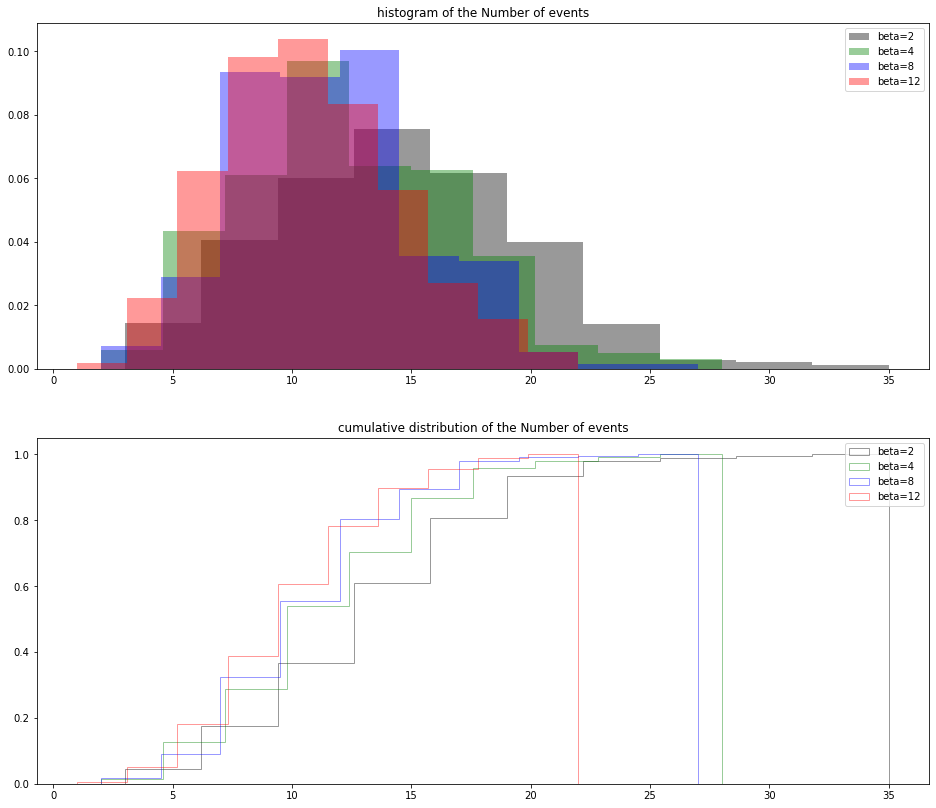

In [290]:
plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
plt.hist(n_events[2], color="black", alpha=0.4, density=True, label="beta=2")
plt.hist(n_events[4], color="green", alpha=0.4, density=True, label="beta=4")
plt.hist(n_events[8], color="blue", alpha=0.4, density=True, label="beta=8")
plt.hist(n_events[12], color="red", alpha=0.4, density=True, label="beta=12")

plt.title("histogram of the Number of events")
plt.legend()

plt.subplot(2,1,2)
plt.hist(n_events[2], color="black",alpha=0.4,histtype='step', density=True, cumulative=1, label="beta=2")
plt.hist(n_events[4], color="green",alpha=0.4,histtype='step',density=True,  cumulative=1, label="beta=4")
plt.hist(n_events[8], color="blue", alpha=0.4,histtype='step',density=True, cumulative=1, label="beta=8")
plt.hist(n_events[12], color="red", alpha=0.4, histtype='step', density=True,cumulative=1, label="beta=12")

plt.title("cumulative distribution of the Number of events")
plt.legend()
plt.show()

### Comments


- The increase of the value of beta causes a decay on the exponential $e^{-\beta t}$ which decreases the value of $\lambda(t)$ as it depends on this latter. 

- the reduction of the value of $\lambda(t)$ reduces the probability of retaining a jump time t through $\frac{\lambda(t)}{\lambda^* }\geq P$ causing less event occurences. 

- This explains the graph of $\lambda$ and $N_t$ obtained above: the intensity in the case of $\beta=2$ is higher than the others . The same thing occurs with the number of events $N_t$ with $\beta=2$. 

- Also the same conclusion can be done using the histogram of the number of events $N_t$(mean, variance). The mean of the number of events in the case of $\beta=2$ is higher than that of the higher beta. This shows that the values of the intensity for lower beta can take much higher values than with the others beta. 

## Homegeneous Poisson processes 

We simulate an equivalent homogeneous poisson process with the average $λ^*=\frac{N}{T}$ obtained by computing the mean of the number of events over 10000 simulations. To simulate a homogeneous Poisson process of parameter $λ^{∗}$, we know that the sequence of random variables $T_{i+1}−T_{i}\rightarrow \exp(λ^{∗})$ and are i.i.d. We thus simulate these random variables and compute their cumulated sum to obtain the instances of the events of the corresponding process Nt.

In [328]:
T = 1
lambda_0 = 10
alpha = 1
beta = 2
n_simulations = 10000
len_event = []

for i in range(n_simulations):
    N, l = Proces_Hawkes(T, lambda_0, alpha, beta)
    len_event+=[len(N)-1]

lambda_star = np.mean(len_event)
lambda_star

14.3702

In [335]:
def poisson_homogeneous(T, lambda_):
    t = 0
    N = [0]
    while t<T:
        u = np.random.exponential(1/lambda_)
        t = t+u
        if t<T:
            N+=[t]
    return N

In [347]:
n_simulaton = 1000
lambda_=lambda_star

        

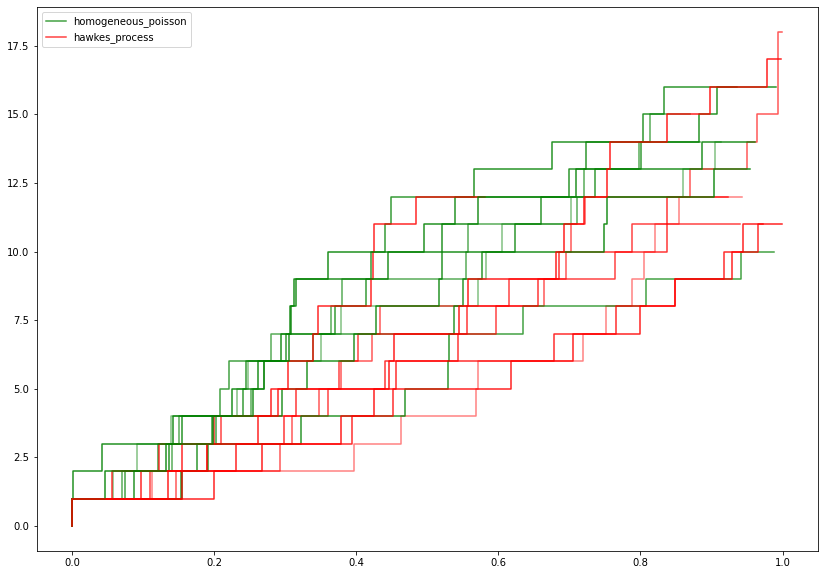

In [377]:
plt.figure(figsize=(14,10))
beta=2
n_sim = 10
for sim in range(1, n_sim):
    time_events_hawkes, lambda_time = Proces_Hawkes(T, lambda_0, alpha, beta)
    time_events_poisson = poisson_homogeneous(T, lambda_)
    x=time_events_poisson
    y=np.cumsum(np.ones(len(time_events_poisson)))-1
    z = time_events_hawkes
    w =np.cumsum(np.ones(len(time_events_hawkes)))-1
    if sim==4:
        plt.step(x,y, color="green", label="homogeneous_poisson", alpha=1-1/sim)
        plt.step(z,w, color='red', label="hawkes_process",alpha=1-1/sim)
        plt.legend()
    else:
        plt.step(x,y, color="green", alpha=1-1/sim)
        plt.step(z,w, color='red',alpha=1-1/sim)
plt.show()

## Comments

We can observe by comparing multiple times  the Hawkes and the Poisson homogeneous processes, that these two depic sometimes some similarity. The number of events generated during a given period of time is very similar which is normal because we parameterized the intensity of the Poisson process based on the simulations of the Hawkes process.Also , we obtain step functions that are close in behaviour (on average).

We were expecting more irregularities for the Hawkes process as its intensity is not constant over time. This goes against the few simulation we did . Still, an equivalent homegeneous poisson process of intensity $\lambda^{*}$ represents a good approximation of the hawkes process. 